# USB Sensor API and Plots

In [1]:
## Import Modules
import matplotlib
import pandas as pd
import json
import urllib.request
import datetime as dt
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    'font.size': 16
})

### Set analysis time limits

In [2]:
## Recommended to not exceed 20 days to allow inter0perability of graphs
startDate = dt.datetime.strptime('2020-02-01T00:00:00+0000', "%Y-%m-%dT%H:%M:%S%z")
endDate   = dt.datetime.strptime('2020-02-14T23:59:59+0000', "%Y-%m-%dT%H:%M:%S%z")

### Use API to call number of rooms on nth floor of USB that have occupancy sensors

In [3]:
## Select Floor 
floor = '2'

## Create API Call Components 
## Note pageSize (Default 10, currently set to 100, may need to be more depending on chosen floor).
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/entity/'
floorCall = callBase + '?meta:buildingFloor=' + floor + '&metric=occupied&pageSize=100'

## Call API
usbRmsOnFlr = json.loads(
    urllib
        .request
        .urlopen(floorCall)
        .read()
        .decode('utf-8')
)['items']

## Print API Call - Click to see JSON Output
print(floorCall)

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/entity/?meta:buildingFloor=2&metric=occupied&pageSize=100


In [4]:
print('Sensors located in %u rooms.' % len(usbRmsOnFlr))

Sensors located in 45 rooms.


In [5]:
## List currently occupied rooms
## Includes check to discount rooms that don't have a 'latest' field
for rm in usbRmsOnFlr:
    if 'latest' in rm['feed'][0]['timeseries'][0]:
        if 'value' in rm['feed'][0]['timeseries'][0]['latest']:
            if rm['feed'][0]['timeseries'][0]['latest']['value'] == 1:
                if "Room" in rm["name"]:
                    print(rm["name"])

Urban Sciences Building: Floor 2: Room 2.004
Urban Sciences Building: Floor 2: Room 2.005
Urban Sciences Building: Floor 2: Room 2.008
Urban Sciences Building: Floor 2: Room 2.010
Urban Sciences Building: Floor 2: Room 2.012
Urban Sciences Building: Floor 2: Room 2.014
Urban Sciences Building: Floor 2: Room 2.015
Urban Sciences Building: Floor 2: Room 2.020
Urban Sciences Building: Floor 2: Room 2.021
Urban Sciences Building: Floor 2: Room 2.022 Zone 2
Urban Sciences Building: Floor 2: Room 2.026
Urban Sciences Building: Floor 2: Room 2.027
Urban Sciences Building: Floor 2: Room 2.038 Zone 1
Urban Sciences Building: Floor 2: Room 2.038 Zone 2
Urban Sciences Building: Floor 2: Room 2.048 Zone 1
Urban Sciences Building: Floor 2: Room 2.048 Zone 2
Urban Sciences Building: Floor 2: Room 2.048 Zone 3
Urban Sciences Building: Floor 2: Room 2.048 Zone 4
Urban Sciences Building: Floor 2: Room 2.048 Zone 5
Urban Sciences Building: Floor 2: Room 2.058 Zone 1
Urban Sciences Building: Floor 2: Roo

### Select a room, list all variables

In [6]:
room = 'room-5-009'

roomCall = callBase + room

usbRoomData = json.loads(
    urllib
        .request
        .urlopen(roomCall)
        .read()
        .decode('utf-8')
)['feed']

print(roomCall)

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/entity/room-5-009


In [7]:
## List Measured Variables
for variable in usbRoomData:
    print(variable['metric'])

Window Alarm 1
Room Brightness
Room Temperature
CO2
Heating Valve Position
Relative Humidity
Mode
Mode Input
Actual Heating Set point
Actual Cooling Set point
Cooling Valve Position
Light Power Level
Occupancy Sensor
Eco Cooling Set Point
Eco Heating Set Point Write
Eco Cooling Set Point Write
Eco Heating Set Point


### Compare data for temperature and CO2 during February

In [8]:
## Choose Room of Interest
## Note some rooms will return a "Forbidden" error - if you recieve this, choose another!
room = 'room-5-009'

## Set Variables of Interest
var1 = 'Room Temperature'
var2 = 'CO2'

## Update Call Base
callBase = 'https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/'

callVar1 = callBase + room + '/' + str(var1).replace(' ', '%20') + '/raw/historic/?startTime=' +\
startDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + endDate.isoformat().replace('+00:00', 'Z')
callVar2 = callBase + room + '/' + str(var2).replace(' ', '%20') + '/raw/historic/?startTime=' +\
startDate.isoformat().replace('+00:00', 'Z') + '&endTime=' + endDate.isoformat().replace('+00:00', 'Z')

usbVar1 = json.loads(
    urllib
        .request
        .urlopen(callVar1)
        .read()
        .decode('utf-8')
)['historic']['values']

usbVar2 = json.loads(
    urllib
        .request
        .urlopen(callVar2)
        .read()
        .decode('utf-8')
)['historic']['values']

print(callVar1)

https://api.usb.urbanobservatory.ac.uk/api/v2/sensors/timeseries/room-5-009/Room%20Temperature/raw/historic/?startTime=2020-02-01T00:00:00Z&endTime=2020-02-14T23:59:59Z


In [9]:
print(var1+' has '+str(len(usbVar1))+' readings, '+ var2+' has '+str(len(usbVar2))+' readings.')

Room Temperature has 433 readings, CO2 has 1795 readings.


In [10]:
## Convert JSON to Pandas DataFrame, Keeping Time (as Index) and Value
dfVar1 = pd.DataFrame.from_records(usbVar1, exclude=['duration'])
dfVar1.index = pd.to_datetime(dfVar1["time"])
dfVar1 = dfVar1.drop(columns="time")
dfVar2 = pd.DataFrame.from_records(usbVar2, exclude=['duration'])
dfVar2.index = pd.to_datetime(dfVar2["time"])
dfVar2 = dfVar2.drop(columns="time")

dfVar2

,value
time,
2020-02-14 23:48:09.831000+00:00,517.76
2020-02-14 23:33:11.432000+00:00,520.00
2020-02-14 22:53:47.298000+00:00,517.76
2020-02-14 22:33:10.860000+00:00,516.80
2020-02-14 22:23:41.665000+00:00,514.88
...,...
2020-02-01 01:27:33.809000+00:00,579.84
2020-02-01 01:12:39.653000+00:00,584.00
2020-02-01 00:57:36.379000+00:00,582.72


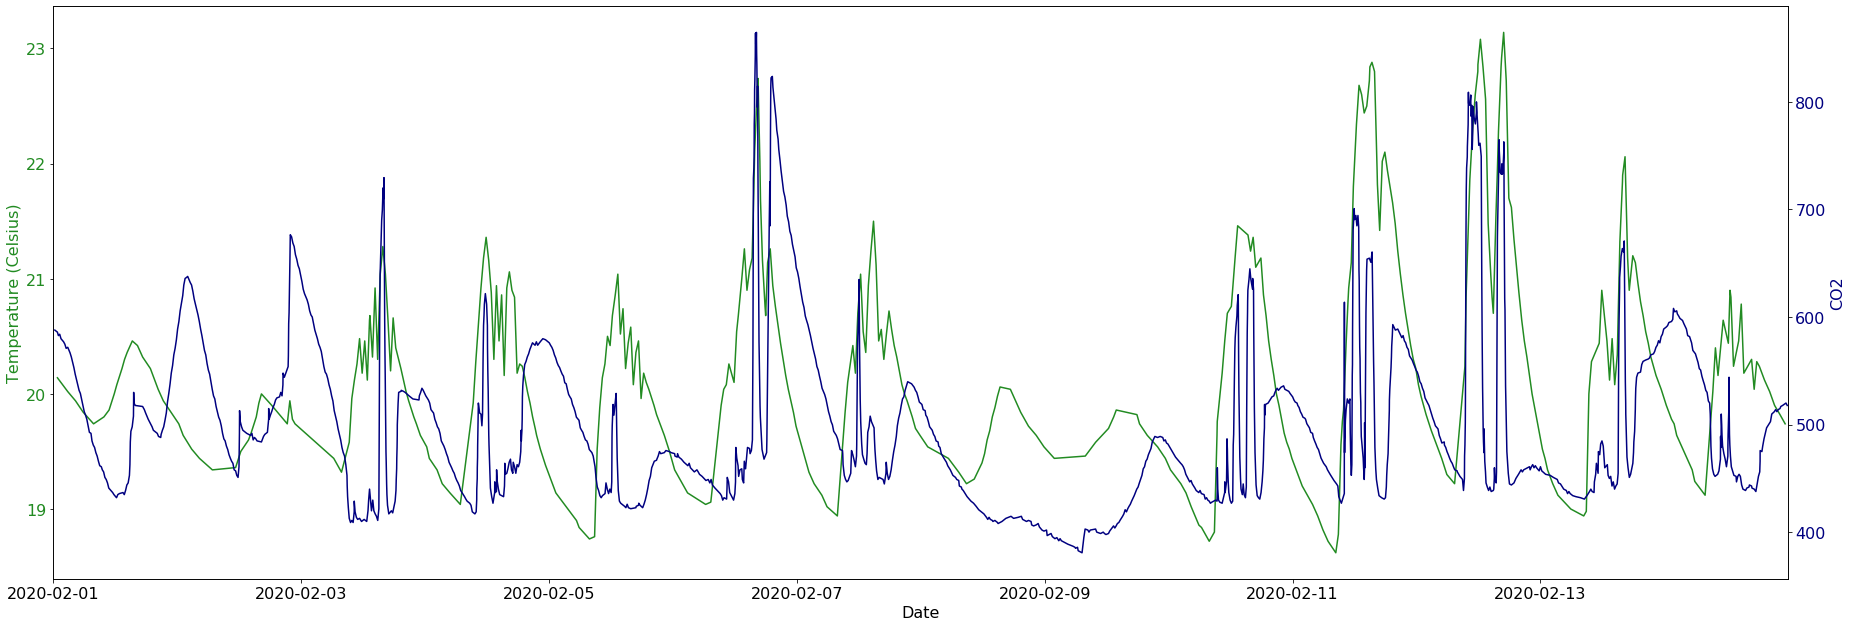

In [11]:
## Plot Data
fig, ax1 = plt.subplots(figsize=(26,9)) 

plt.xlim(startDate,endDate)

ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (Celsius)', color='forestgreen')
ax1.plot(dfVar1["value"], color='forestgreen')
ax1.tick_params(axis='y', labelcolor='forestgreen')

ax2 = ax1.twinx()

ax2.set_ylabel('CO2', color='navy') 
ax2.plot(dfVar2["value"], color='navy')
ax2.tick_params(axis='y', labelcolor='navy')

fig.tight_layout()
plt.show()